In [1]:
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

In [11]:
import torch
import torch.nn as nn
x = torch.rand(32, 1, 97, 32, 32)

model = nn.Conv3d(1, 1024, (97, 8, 8), 8, 0)
output = model(x)
output.shape

torch.Size([32, 1024, 1, 4, 4])

In [12]:
spatial_t1 = output.flatten(2)
spatial_t1 = spatial_t1.transpose(-1, -2)
spatial_t1.shape 

torch.Size([32, 16, 1024])

In [6]:
import xarray as xr

out = xr.open_dataset('/data1/fog-data/fog-maps/2009/2009001/maps_20090101_0000_000_input.nc')
out

<xarray.Dataset>
Dimensions:              (y: 32, x: 32, time: 1)
Coordinates:
  * y                    (y) float64 0.0 1.219e+04 ... 3.657e+05 3.779e+05
  * x                    (x) float64 0.0 1.219e+04 ... 3.657e+05 3.779e+05
    latitude             (y, x) float64 ...
    longitude            (y, x) float64 ...
  * time                 (time) datetime64[ns] 2009-01-01
Data variables: (12/107)
    UGRD_10maboveground  (time, y, x) float32 ...
    UGRD_975mb           (time, y, x) float32 ...
    UGRD_950mb           (time, y, x) float32 ...
    UGRD_925mb           (time, y, x) float32 ...
    UGRD_900mb           (time, y, x) float32 ...
    UGRD_875mb           (time, y, x) float32 ...
    ...                   ...
    DQDZ775800           (time, x, y) float32 ...
    DQDZ750775           (time, x, y) float32 ...
    DQDZ725750           (time, x, y) float32 ...
    DQDZ700725           (time, x, y) float32 ...
    LCLT                 (time, x, y) float32 ...
    DateVal              (time) float32 ...
Attributes:
    Conventions:          CF-1.0
    History:              Thu May 14 19:47:56 2020: ncks --no_alphabetize -O ...
    GRIB2_grid_template:  30
    NCO:                  netCDF Operators version 4.9.2 (Homepage = http://n...

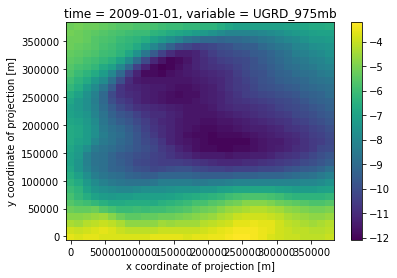

In [12]:
out.to_array().isel(variable = 1).plot()